In [1]:
import gensim

import gensim.corpora as corpora
from gensim.models import LdaModel

import utils.filemanagement
from utils.filemanagement import get_project_root
from utils.filemanagement import load_from_file
from pprint import pprint
import os

In [2]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

NUM_TOPICS = 10
TOPN = 20
model_type = "lda"
model_name="LDA"
data_type = "np_mini_basic"
embedding_model = "preliminary"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"

file_name_data = f"{data_type}.csv"
folder_path_word_cloud = f"preprocessed_data/wordclouds/preliminary/{file_name}"
folder_name = f"Preliminary-experiment/models/{model_type}"
random_sample = False
df = load_from_file(folder_path_data,file_name_data)
seed = 42
folder_name = f"Preliminary-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

In [3]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))


data_words = list(sent_to_words(new_data))

In [4]:
import os
from gensim.models import LdaMulticore

id2word = corpora.Dictionary(data_words)
texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
folder_name = f"Preliminary-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

try:
    lda = LdaMulticore.load(file_path)
except:
    lda = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=NUM_TOPICS,
                                       random_state=42,
                                       #chunksize=100,
                                       #passes=15,
                                       #per_word_topics=True
                                      )
    LdaMulticore.save(lda, file_path)

In [5]:
lda.get_topics()

array([[1.1160839e-04, 2.6954865e-04, 4.6898931e-04, ..., 1.3766636e-06,
        1.3104817e-06, 1.3610044e-06],
       [8.8020744e-05, 2.9362671e-04, 4.4462096e-04, ..., 6.6816858e-07,
        7.1646298e-07, 7.0452455e-07],
       [1.0671949e-04, 2.3043808e-04, 5.5587513e-04, ..., 3.3888687e-06,
        4.3695136e-06, 3.9406641e-06],
       ...,
       [9.5672367e-05, 3.3346468e-04, 4.3400028e-04, ..., 3.2483706e-06,
        3.2483701e-06, 3.2483683e-06],
       [7.1192240e-05, 2.2508169e-04, 5.9680891e-04, ..., 2.4701076e-06,
        2.7564715e-06, 2.8779702e-06],
       [9.4138915e-05, 2.4456729e-04, 4.4440207e-04, ..., 2.5009688e-06,
        2.2319518e-06, 2.2527670e-06]], dtype=float32)

In [6]:
lda.get_topic_terms(0,5)

[(44, 0.039744847),
 (56, 0.030803178),
 (173, 0.02667616),
 (219, 0.02472327),
 (71, 0.022323944)]

In [7]:
topic_words = [[] for i in range(NUM_TOPICS)]

for i in range(NUM_TOPICS):
    r = lda.get_topic_terms(i,TOPN)
    for item in r:
        topic_words[i].append(id2word[item[0]])

In [8]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, topic_words[i]) for i in range(NUM_TOPICS)]

folder_path_topics = r"preprocessed_data/results"

write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [9]:

# Print the Keyword in the 10 topics
pprint(lda.print_topics())
doc_lda = lda[corpus]

[(0,
  '0.040*"det" + 0.031*"er" + 0.027*"og" + 0.025*"som" + 0.022*"for" + '
  '0.022*"at" + 0.020*"vi" + 0.019*"har" + 0.019*"til" + 0.019*"pa"'),
 (1,
  '0.040*"det" + 0.032*"og" + 0.032*"at" + 0.027*"er" + 0.022*"til" + '
  '0.021*"for" + 0.020*"vi" + 0.020*"som" + 0.019*"har" + 0.017*"en"'),
 (2,
  '0.049*"det" + 0.036*"er" + 0.030*"at" + 0.029*"og" + 0.021*"til" + '
  '0.020*"pa" + 0.019*"vi" + 0.018*"som" + 0.017*"har" + 0.015*"for"'),
 (3,
  '0.025*"det" + 0.024*"er" + 0.023*"og" + 0.020*"for" + 0.019*"vi" + '
  '0.017*"at" + 0.015*"som" + 0.014*"pa" + 0.014*"en" + 0.014*"til"'),
 (4,
  '0.055*"det" + 0.041*"er" + 0.028*"som" + 0.028*"og" + 0.022*"at" + '
  '0.019*"pa" + 0.017*"til" + 0.013*"har" + 0.013*"de" + 0.013*"om"'),
 (5,
  '0.037*"og" + 0.034*"er" + 0.032*"det" + 0.029*"som" + 0.027*"at" + '
  '0.023*"for" + 0.021*"til" + 0.021*"har" + 0.014*"en" + 0.014*"vi"'),
 (6,
  '0.048*"det" + 0.032*"er" + 0.028*"og" + 0.026*"som" + 0.023*"at" + '
  '0.021*"for" + 0.015*"pa" + 0

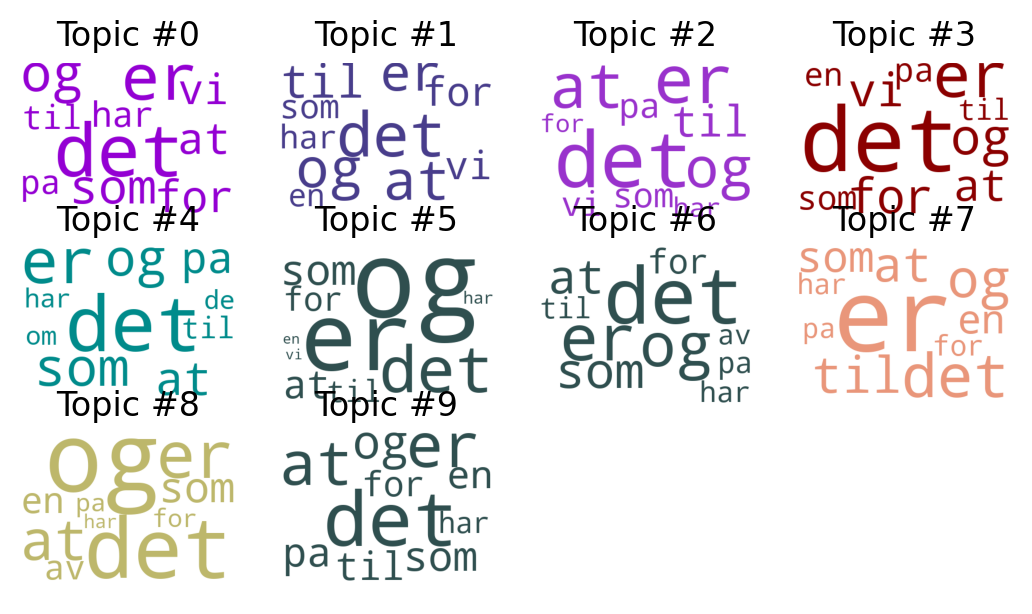

In [10]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds([dict(lda.show_topic(i)) for i in range(NUM_TOPICS)], f"{model_name}: {data_type}", NUM_TOPICS, dpi=200)

In [11]:
formatted_topics = [dict(lda.show_topic(i)) for i in range(NUM_TOPICS)]

In [12]:
reck = [dict(lda.show_topic(i)) for i in range(NUM_TOPICS)]
print(reck)

[{'det': 0.039744847, 'er': 0.030803178, 'og': 0.02667616, 'som': 0.02472327, 'for': 0.022323944, 'at': 0.021728558, 'vi': 0.020024858, 'har': 0.018881924, 'til': 0.018695304, 'pa': 0.01852871}, {'det': 0.039722204, 'og': 0.031746965, 'at': 0.031683415, 'er': 0.027431292, 'til': 0.021902572, 'for': 0.020528924, 'vi': 0.020031886, 'som': 0.019763794, 'har': 0.018566104, 'en': 0.01689395}, {'det': 0.04861907, 'er': 0.03562933, 'at': 0.029832141, 'og': 0.029222947, 'til': 0.021014795, 'pa': 0.0195697, 'vi': 0.018661112, 'som': 0.018496558, 'har': 0.017367247, 'for': 0.014669502}, {'det': 0.025133163, 'er': 0.024103424, 'og': 0.022788541, 'for': 0.020285372, 'vi': 0.019113662, 'at': 0.017465007, 'som': 0.014545124, 'pa': 0.014275574, 'en': 0.013960434, 'til': 0.013729001}, {'det': 0.055289276, 'er': 0.040890396, 'som': 0.027856931, 'og': 0.027788844, 'at': 0.02241523, 'pa': 0.019040503, 'til': 0.017440004, 'har': 0.013446802, 'de': 0.01339419, 'om': 0.013183953}, {'og': 0.03701823, 'er': 0

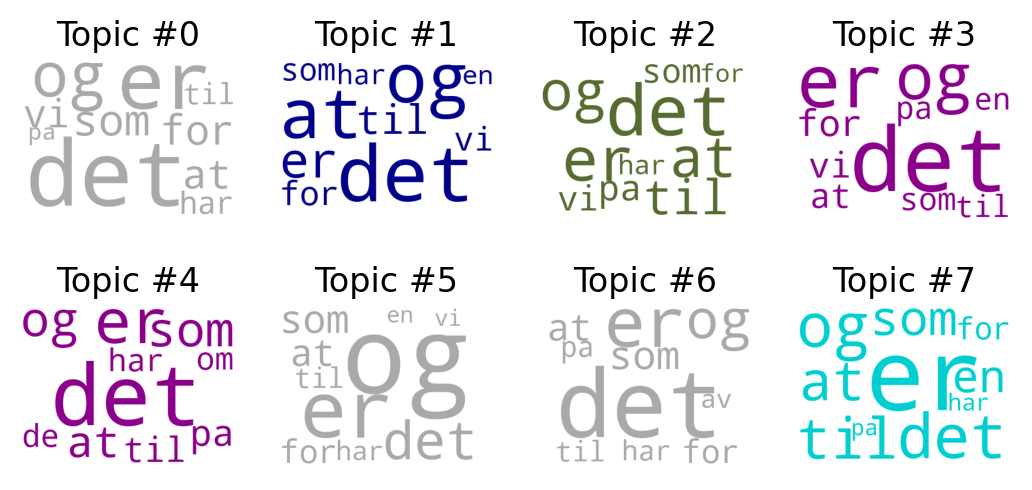

In [13]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [14]:
from utils.tables_and_plots import create_wordcloud



wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))

file_name_model = "wordcloud"
for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(lda.show_topic(i)))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [15]:
lda.show_topic(1)

[('det', 0.039722204),
 ('og', 0.031746965),
 ('at', 0.031683415),
 ('er', 0.027431292),
 ('til', 0.021902572),
 ('for', 0.020528924),
 ('vi', 0.020031886),
 ('som', 0.019763794),
 ('har', 0.018566104),
 ('en', 0.01689395)]

In [16]:
# Save topic words of model to file

topics = lda.show_topics(num_words=20, formatted=False)
topic_words = []
for i in range(len(topics)):
    topic_word_list = []
    for j in range(len(topics[i][1])):
        topic_word_list.append(topics[i][1][j][0])
    topic_words.append((i, topic_word_list))


folder_path_topics = r"preprocessed_data/results"


write_topics_file(folder_path_topics, file_name, topic_words)

In [17]:
from utils.filemanagement import load_model_topics

folder_path_topics = r"preprocessed_data/results"

loaded_topics = load_model_topics(folder_path_topics, file_name)

folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [18]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [19]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [20]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('det', 'er') wordtuple
('det', 'er') wordup
760502.0 over
1431151092.0 under
-10.877936328378098 -19.536592516451392 0.5567980352365949 ('det', 'er') 760502 42609 33588
('det', 'og') wordtuple
('det', 'og') wordup
678768.0 over
1309246743.0 under
-10.913530843637481 -19.372559026162516 0.5633499853529329 ('det', 'og') 678768 42609 30727
('det', 'som') wordtuple
('det', 'som') wordup
555039.0 over
1051504902.0 under
-10.887578808848744 -19.082229620908212 0.5705611464249088 ('det', 'som') 555039 42609 24678
('det', 'for') wordtuple
('det', 'for') wordup
419994.0 over
823717188.0 under
-10.937564659711306 -18.68000919225184 0.5855224452591826 ('det', 'for') 419994 42609 19332
('at', 'det') wordtuple
('at', 'det') wordup
582275.0 over
1158283056.0 under
-10.957999557348646 -19.151341152370996 0.5721792259959826 ('at', 'det') 582275 42609 27184
('det', 'vi') wordtuple
('det', 'vi') wordup
376537.0 over
688007523.0 under
-10.835416988059718 -18.52243211116344 0.584988889311638 ('det', '

In [21]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.06058406373843607


In [22]:
print(diversity)
print(coherence)

0.14
0.8141307776672606


In [23]:
# Check the stats for the dataset after running basic pipeline
from tabulate import tabulate
import csv
models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════╤═══════════╤══════════╕
│ Model                         │ Metric    │    Value │
╞═══════════════════════════════╪═══════════╪══════════╡
│ lda_preliminary_np_mini_basic │ coherence │ 0.814131 │
├───────────────────────────────┼───────────┼──────────┤
│ lda_preliminary_np_mini_basic │ diversity │ 0.14     │
╘═══════════════════════════════╧═══════════╧══════════╛


In [24]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})